# Year-long Mn run with ice!

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import matplotlib
import file_tools as ft
import plot_tools as pt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [13]:
%load_ext autoreload
%autoreload

Load results

In [2]:
lats, lons, dmn_monthly, omn_monthly = ft.monthly_averages('/data/brogalla/Mn_2002/'+ \
                                                              'all_on_2019-01-28T135133.531012-0500/', \
                                                              'ANHA12_EXH006_5d_', '2002')

In [3]:
lats_riv, lons_riv, dmn_monthly_riv, omn_monthly_riv = ft.monthly_averages('/data/brogalla/Mn_2002/'+ \
                                                              'all_on_2019-02-05T200322.445562-0500/', \
                                                              'ANHA12_EXH006_5d_', '2002')

In [4]:
lats_ice, lons_ice, dmn_monthly_ice, omn_monthly_ice = ft.monthly_averages('/data/brogalla/Mn_2002/'+ \
                                                              'all_on_2019-02-06T205420.891424-0500/', \
                                                              'ANHA12_EXH006_5d_', '2002')

#### Model run w. ice, not: rivers

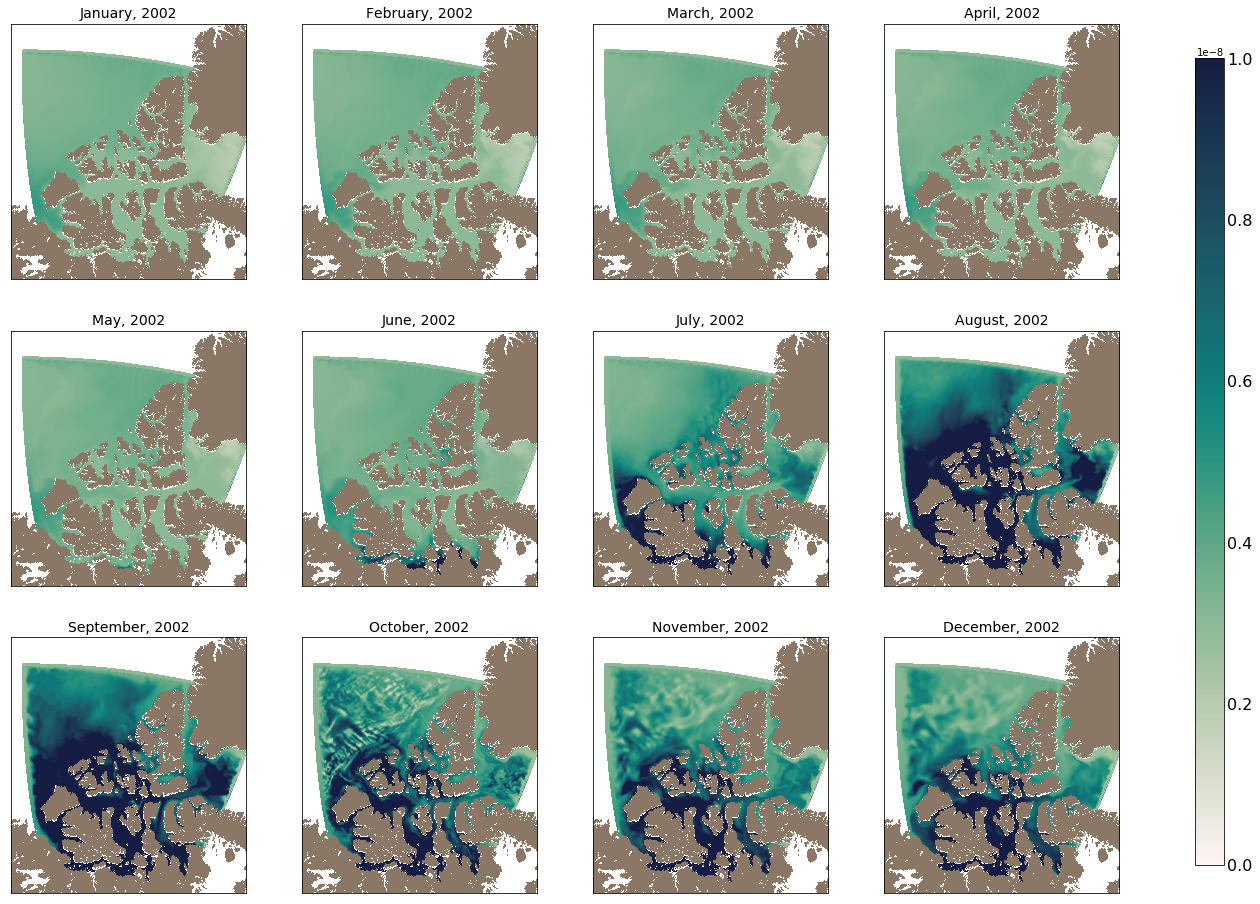

In [5]:
pt.plot_monthly_array(lons, lats, dmn_monthly, 0, 0, 1e-8, '2002', 'Mn',save=True)

#### Model w. ice and rivers

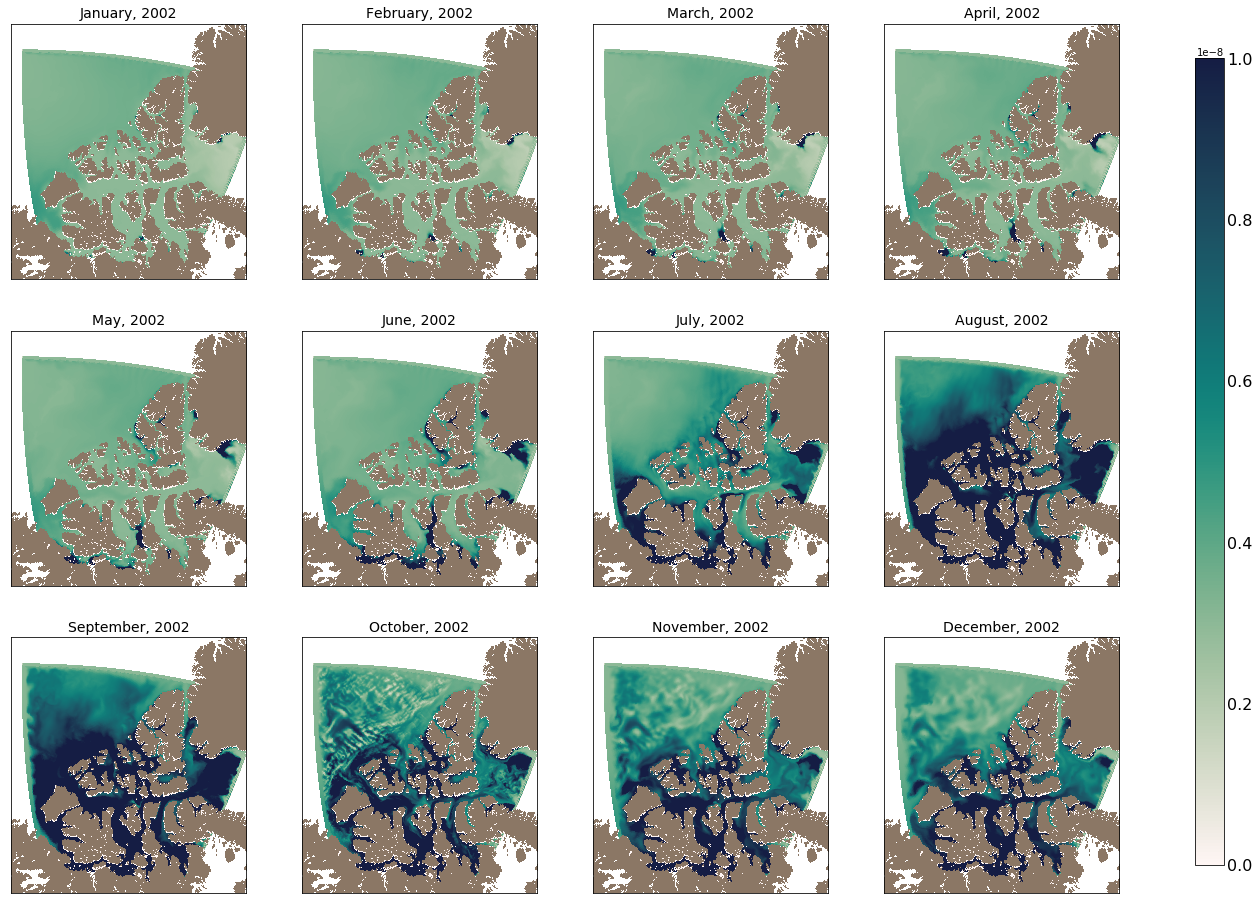

In [6]:
pt.plot_monthly_array(lons_riv, lats_riv, dmn_monthly_riv, 0, 0, 1e-8, '2002', 'Mn', save=True)

#### Model run w. rivers, not: ice

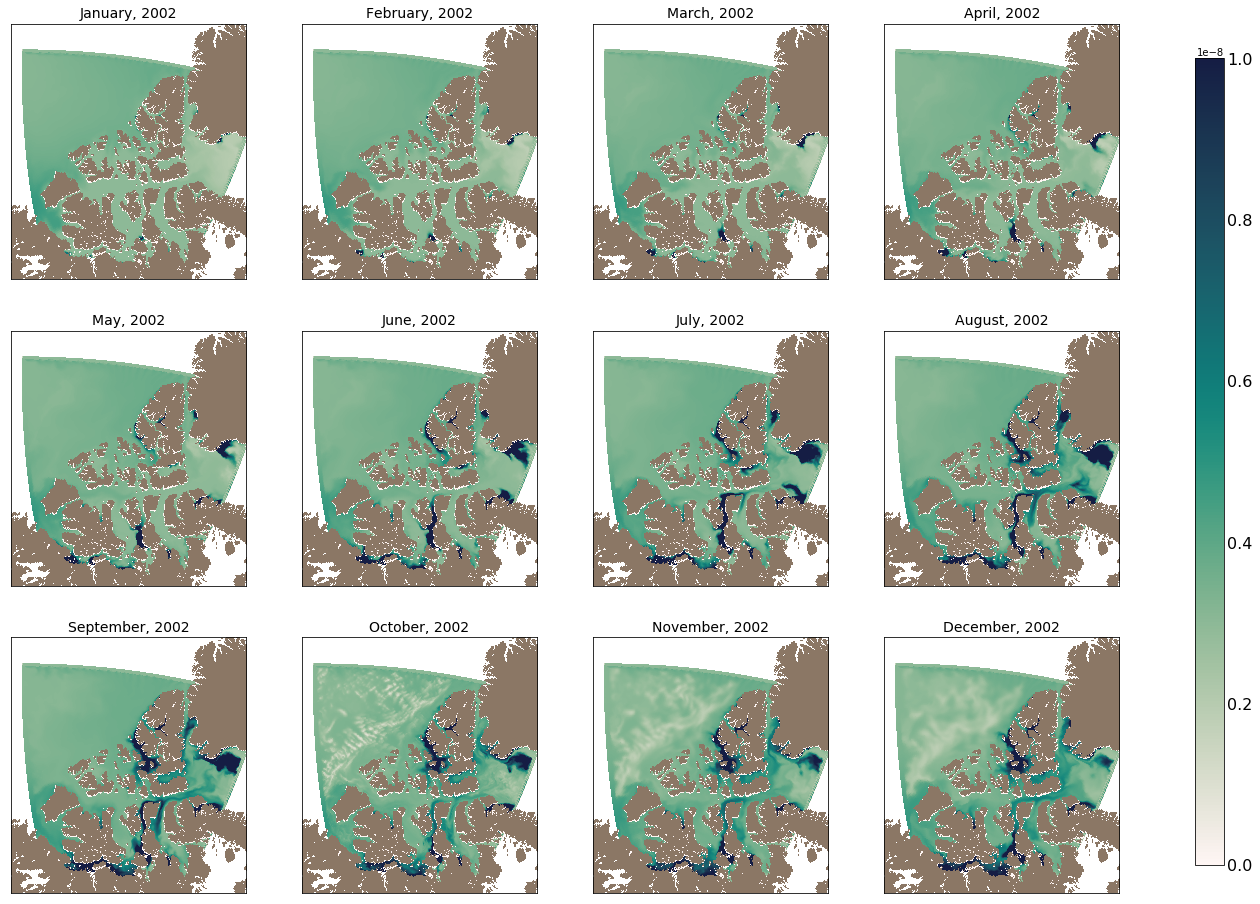

In [7]:
pt.plot_monthly_array(lons_ice, lats_ice, dmn_monthly_ice, 0, 0, 1e-8, '2002', 'Mn', save=True)

## Relative contribution from rivers:

In [10]:
diff = dmn_monthly_riv - dmn_monthly

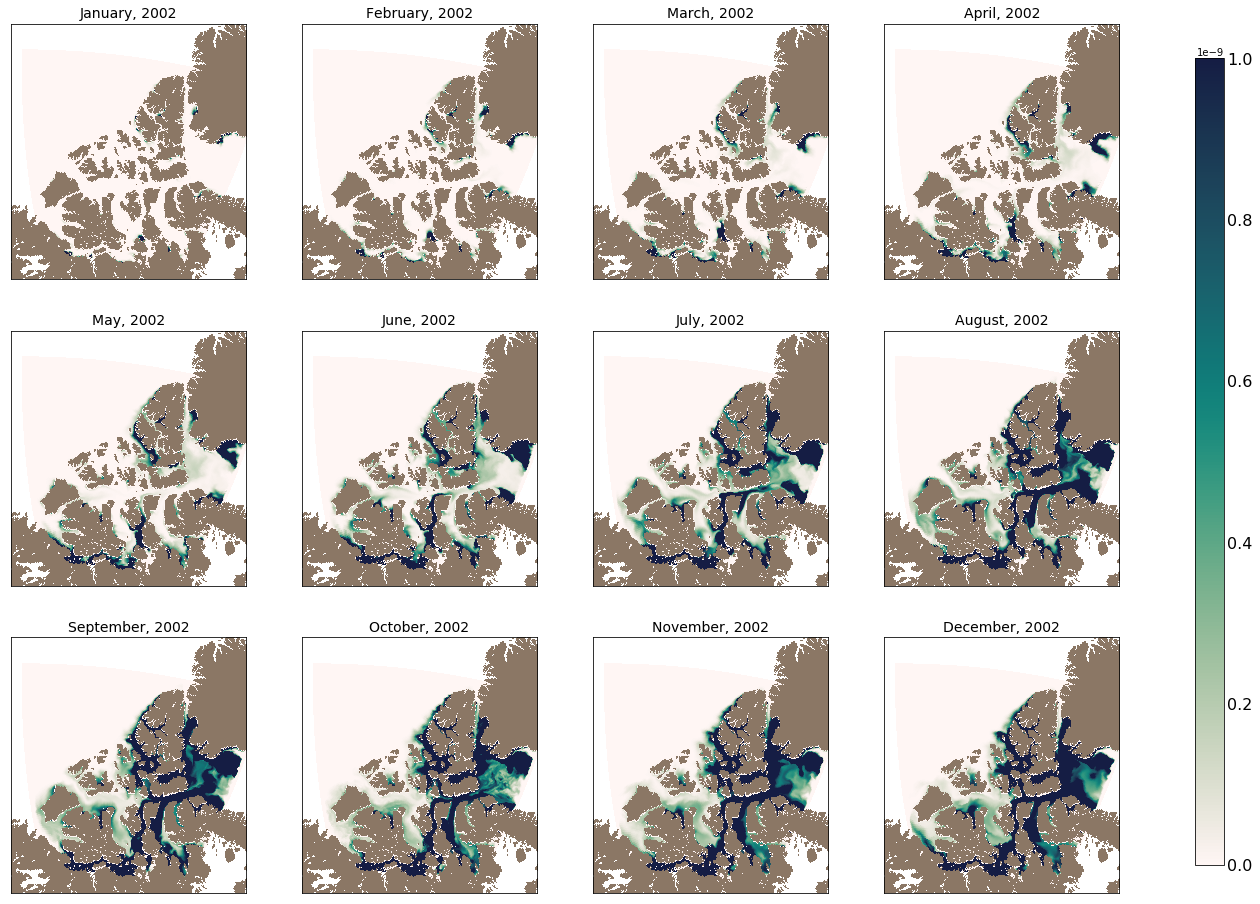

In [11]:
pt.plot_monthly_array(lons_riv, lats_riv, diff, 0, 0, 1e-9, '2002', 'Mn', save=True)

## Relative contribution from ice:

In [5]:
diff_ice = dmn_monthly_riv - dmn_monthly_ice #actually is no ice

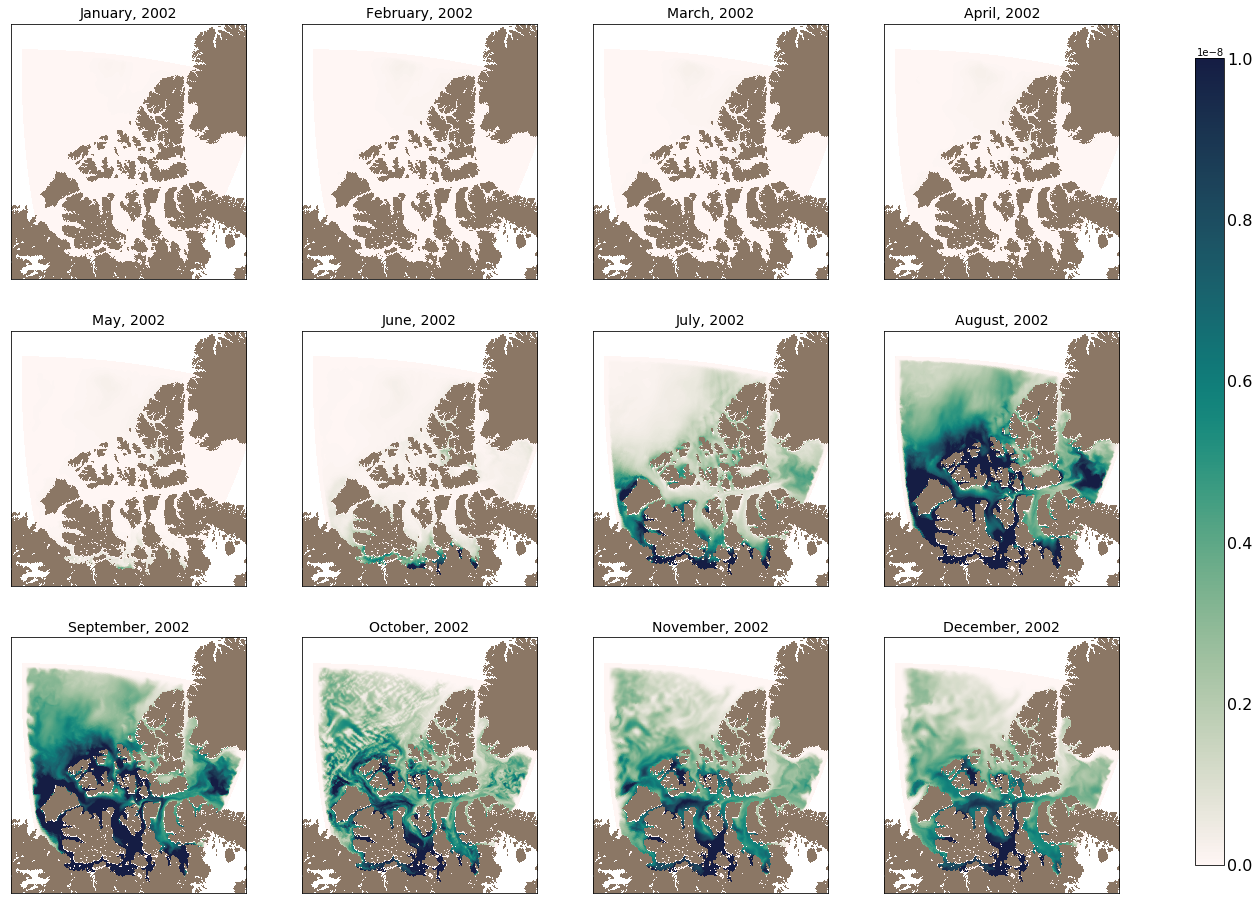

In [8]:
pt.plot_monthly_array(lons_riv, lats_riv, diff_ice, 0, 0, 1e-8, '2002', 'Mn', save=True)

#### Ice forcing fields:

In [6]:
folder = '/ocean/brogalla/GEOTRACES/data/NCAR/'
faero_003_nh   = 'merged_faero_ocn003_nh.nc' #dust
faero_003_n  = nc.Dataset(folder+faero_003_nh)
ocn003 = faero_003_n.variables['faero_ocn003']
ocn003 = np.array(ocn003)
lon  = faero_003_n.variables['TLON']
lat  = faero_003_n.variables['TLAT']
time = faero_003_n.variables['time']

lon = np.array(lon)
for i in range(0,104):
    for j in range(0,320):
        if lon[i,j] >= 180:
            lon[i,j] = -360+lon[i,j]

lons2=np.array(lon)
lats2=np.array(lat)

cond = (ocn003 >= 1e30) 
ocn003_masked = np.ma.masked_where(cond, ocn003) 
i = 0
start_index = 983
end_index = 995
filt_ocn003 = ocn003_masked[start_index+i:end_index,:,:]
filt_lons3 = lons 
filt_lats3 = lats 
filt_ocn003 = np.array(filt_ocn003)
filt_lons3 = np.array(filt_lons3)
filt_lats3 = np.array(filt_lats3)

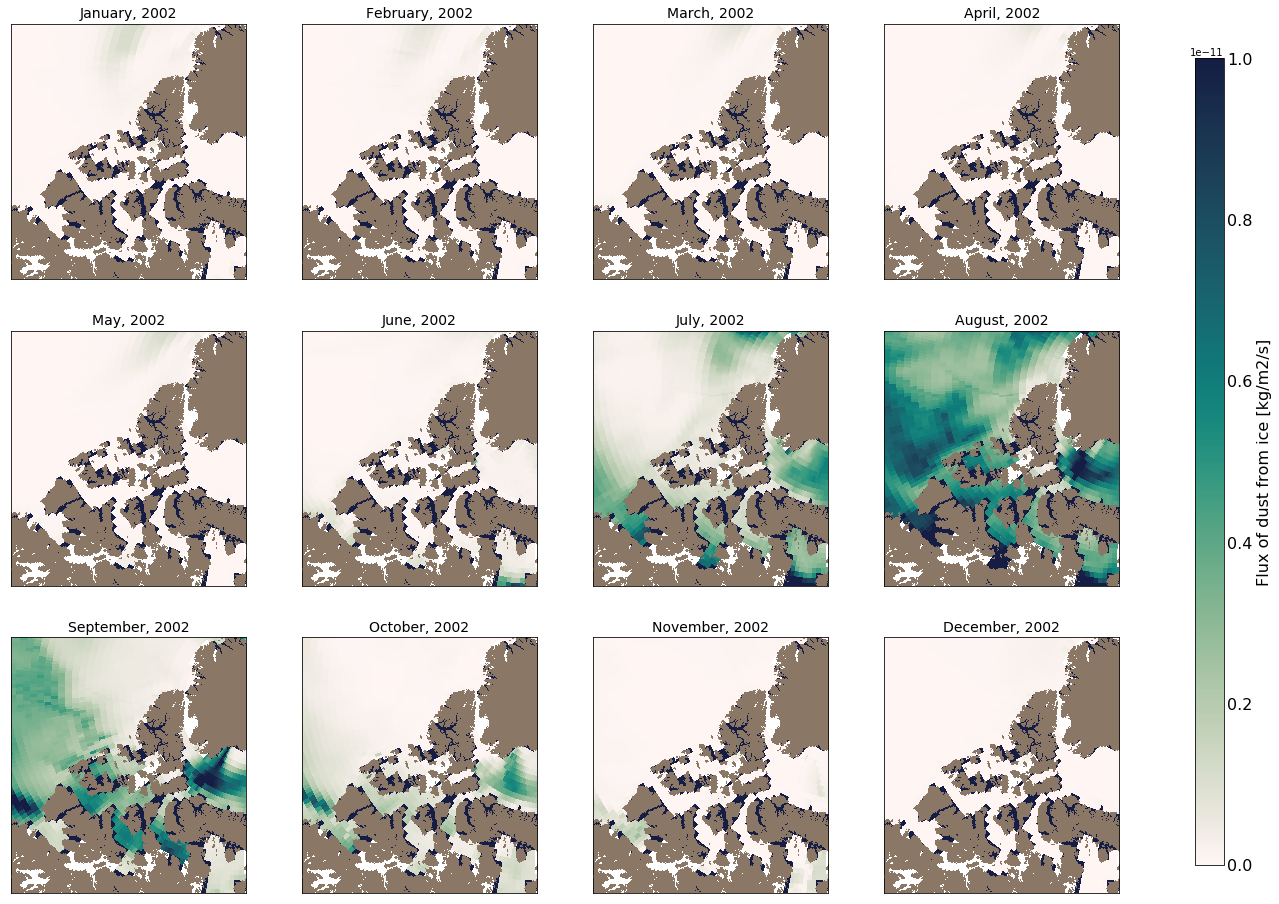

In [14]:
fig, ax = plt.subplots(3, 4, figsize=(20,16))

proj1 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[0,0])
proj1.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj2 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[0,1])
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj3 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[0,2])
proj3.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj4 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[0,3])
proj4.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj5 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[1,0])
proj5.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj6 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[1,1])
proj6.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj7 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[1,2])
proj7.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj8 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[1,3])
proj8.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj9 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[2,0])
proj9.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj10 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[2,1])
proj10.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj11 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[2,2])
proj11.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)
proj12 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -100, resolution='i', width=2.3e6, height=2.5e6, ax=ax[2,3])
proj12.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'i',zorder=2)

x, y = proj1(filt_lons3, filt_lats3)
vmin = 0
vmax = 1e-11
year = '2002'
variable = filt_ocn003

dMn1 = proj1.pcolor(x, y, variable[0,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn2 = proj2.pcolor(x, y, variable[1,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn3 = proj3.pcolor(x, y, variable[2,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn4 = proj4.pcolor(x, y, variable[3,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn5 = proj5.pcolor(x, y, variable[4,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn6 = proj6.pcolor(x, y, variable[5,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn7 = proj7.pcolor(x, y, variable[6,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn8 = proj8.pcolor(x, y, variable[7,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn9 = proj9.pcolor(x, y, variable[8,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn10 = proj10.pcolor(x, y, variable[9,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn11 = proj11.pcolor(x, y, variable[10,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)
dMn12 = proj12.pcolor(x, y, variable[11,:,:], cmap=cmocean.cm.tempo, zorder=1, vmin=vmin, vmax=vmax)

#---------------------
ax[0,0].set_title('January, '+year, fontsize=14)
ax[0,1].set_title('February, '+year, fontsize=14)
ax[0,2].set_title('March, '+year, fontsize=14)
ax[0,3].set_title('April, '+year, fontsize=14)
ax[1,0].set_title('May, '+year, fontsize=14)
ax[1,1].set_title('June, '+year, fontsize=14)
ax[1,2].set_title('July, '+year, fontsize=14)
ax[1,3].set_title('August, '+year, fontsize=14)
ax[2,0].set_title('September, '+year, fontsize=14)
ax[2,1].set_title('October, '+year, fontsize=14)
ax[2,2].set_title('November, '+year, fontsize=14)
ax[2,3].set_title('December, '+year, fontsize=14)

cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(dMn1, ax=ax[0,0], cax=cbaxes) 
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
CBar.ax.set_ylabel('Flux of dust from ice [kg/m2/s]', fontsize=16)
fig.savefig('CICE_monthly_2002.png',bbox_inches='tight')

## General plots:

##### Depth level = 10

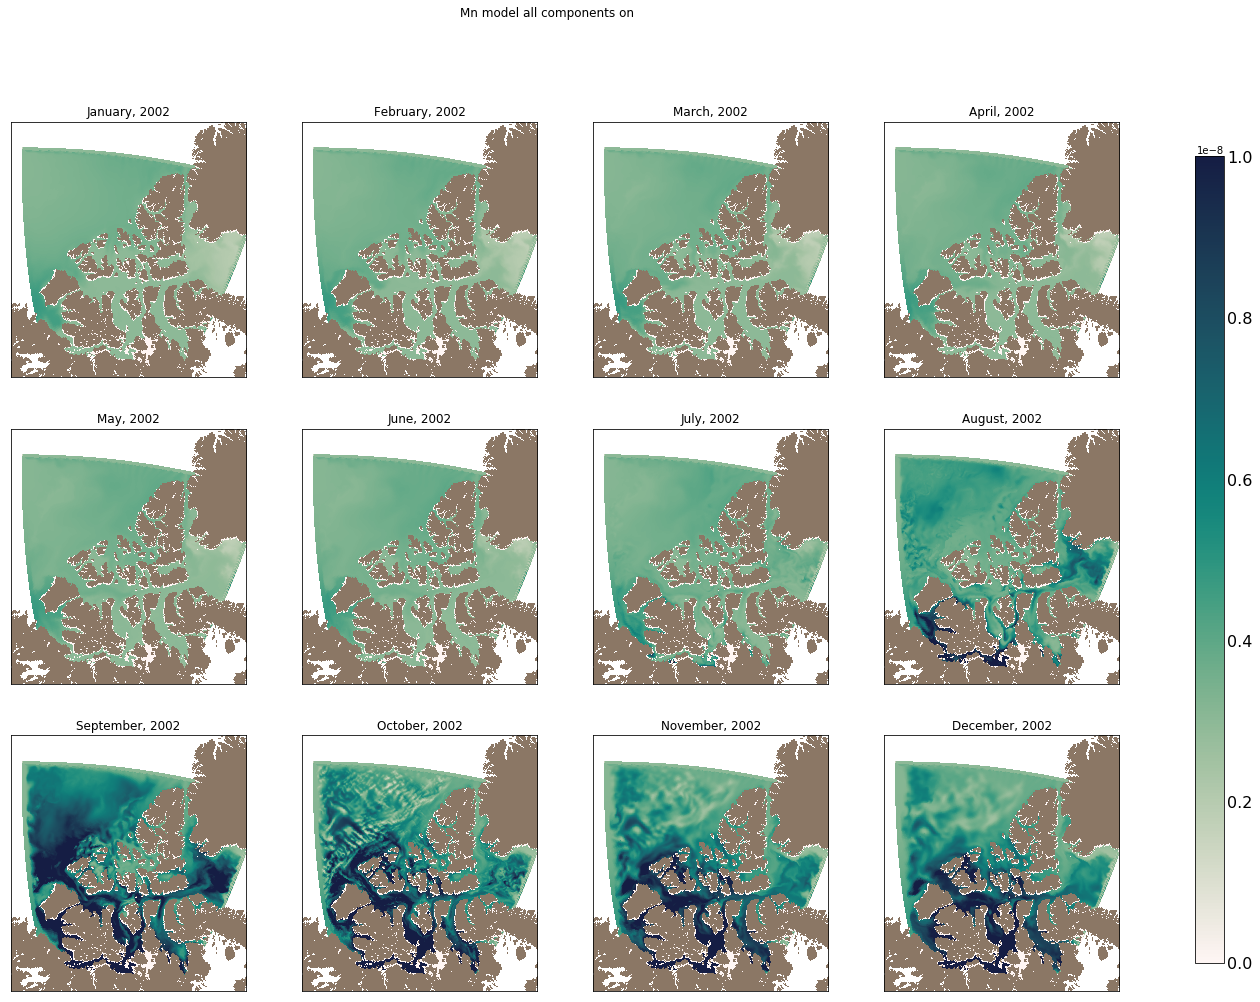

In [14]:
pt.plot_monthly_array(lons, lats, dmn_monthly, 10, 0, 1e-8, '2002', 'Mn model all components on')

#### Depth_level = 15

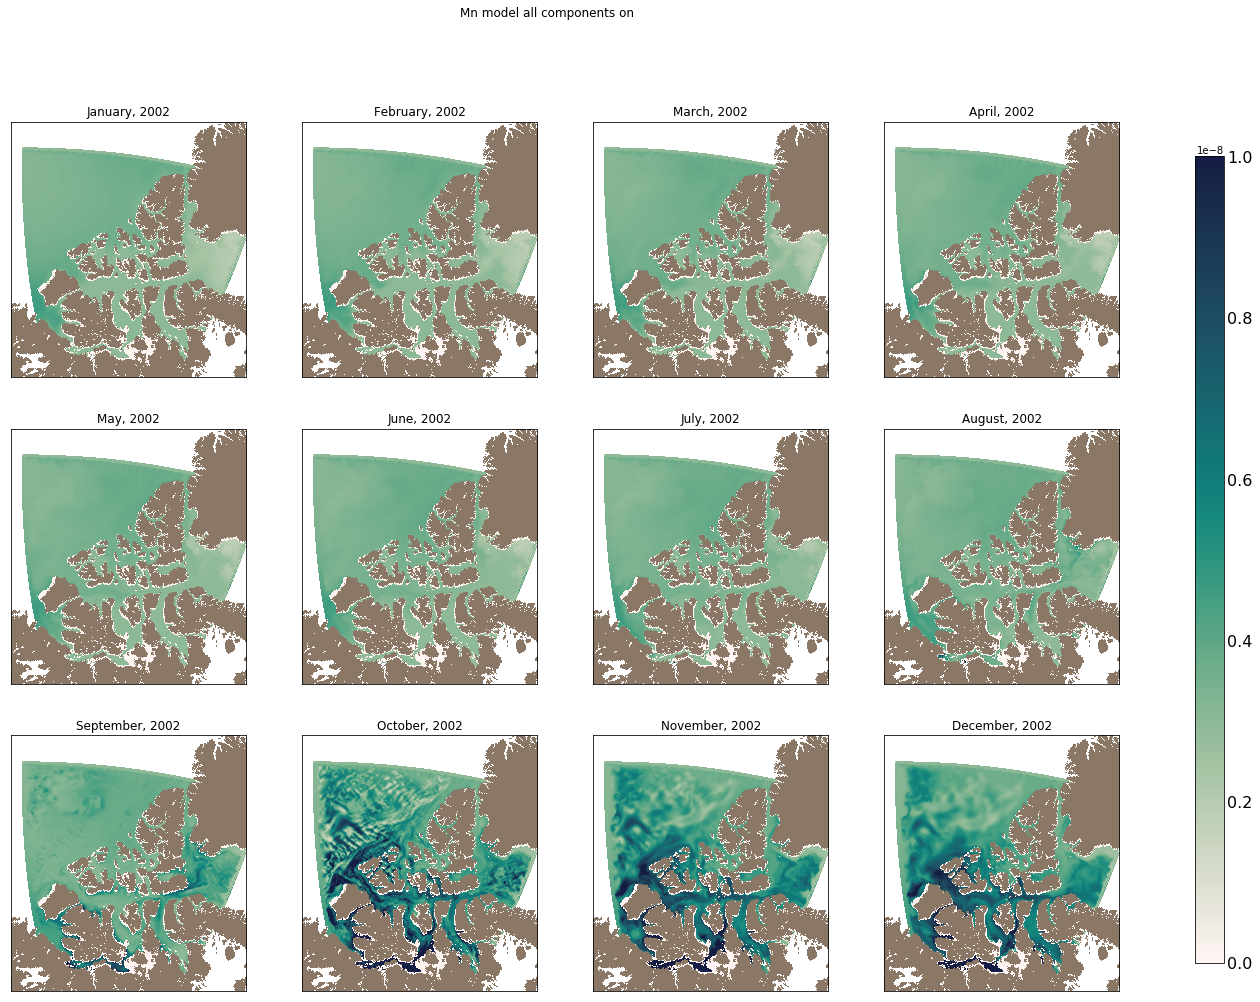

In [12]:
pt.plot_monthly_array(lons, lats, dmn_monthly, 15, 0, 1e-8, '2002', 'Mn model all components on')